# 黄金发展期中的宠物产业特征研究


一、项目背景说明
据统计，2020 年中国宠物产业消费市场规模将预期将达到2200亿。2015年以来国内增加了近60万家主营宠物相关业务的企业，增长达600%，宠物经济已经度过探索期，进入了高速发展的黄金期。

本项目收集了2.4万条线上宠物商品数据和35万条商品评价数据，涵盖了宠物猫、宠物狗和宠物鱼等各类宠物的活体、食品、用品信息。通过对不同分类级别商品的价格、销量、人气等数据综合比较分析，并采用各类数据挖掘算法，分析线上宠物商品特色，主力商品销售特征，优劣店铺的用户口碑，不同产品价值高低，以及为新店开设提供参考建议等。

二、原始数据
项目数据为：
宠物商品分类信息.xlsx
宠物商品评论数据.csv
宠物商品信息.csv


## 1. 数据预处理

In [1]:
# 导入模块
import pandas as pd
import numpy as np

In [2]:
# 导入 .csv 数据
data_info = pd.read_csv("宠物商品信息.csv",engine = 'python',encoding = 'utf-8')

In [4]:
# 查看数据
data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23932 entries, 0 to 23931
Data columns (total 20 columns):
爬取链接(__url)                    23932 non-null object
商品ID(product_id)               23932 non-null int64
商品名称(name)                     23932 non-null object
商品描述(description)              668 non-null object
商品现价(current_price)            23932 non-null object
商品原价(original_price)           23932 non-null object
月销量(sales_count)               22410 non-null object
评论数(comments_count)            22840 non-null float64
发货地址(shipping_address)         23932 non-null object
商品发布时间(sales_count)            23932 non-null int64
商品规格(sku)                      23932 non-null object
商品库存(stock)                    23932 non-null int64
店铺名称(shop_name)                23929 non-null object
店铺url(shop_url)                23932 non-null object
商品参数(params)                   23932 non-null object
商品sku详情(product_sku_detail)    23932 non-null object
商品链接(url)                      23932 non-null o

In [5]:
data_info.columns

Index(['爬取链接(__url)', '商品ID(product_id)', '商品名称(name)', '商品描述(description)',
       '商品现价(current_price)', '商品原价(original_price)', '月销量(sales_count)',
       '评论数(comments_count)', '发货地址(shipping_address)', '商品发布时间(sales_count)',
       '商品规格(sku)', '商品库存(stock)', '店铺名称(shop_name)', '店铺url(shop_url)',
       '商品参数(params)', '商品sku详情(product_sku_detail)', '商品链接(url)',
       '商品详情(detail)', '店铺评分(shop_score)', '宝贝收藏数(fav_count)'],
      dtype='object')

In [7]:
# 重命名列

In [8]:
data_info.columns

Index(['爬取链接(__url)', '商品ID(product_id)', '商品名称(name)', '商品描述(description)',
       '商品现价(current_price)', '商品原价(original_price)', '月销量(sales_count)',
       '评论数(comments_count)', '发货地址(shipping_address)', '商品发布时间(sales_count)',
       '商品规格(sku)', '商品库存(stock)', '店铺名称(shop_name)', '店铺url(shop_url)',
       '商品参数(params)', '商品sku详情(product_sku_detail)', '商品链接(url)',
       '商品详情(detail)', '店铺评分(shop_score)', '宝贝收藏数(fav_count)'],
      dtype='object')

In [9]:
data_info.columns = [ '爬取链接', '商品ID', '商品名称', '商品描述',
       '商品现价', '商品原价', '月销量',
       '评论数', '发货地址',
       '商品发布时间', '商品规格', '商品库存', '店铺名称','店铺链接', '商品参数', 
        '商品sku详情', '商品链接', '商品详情', '店铺评分', '宝贝收藏数']

In [10]:
# 导入 宠物商品分类信息.xlsx 
data_kind = pd.read_excel('宠物商品分类信息.xlsx')

In [11]:
# 查看数据
data_kind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24465 entries, 0 to 24464
Data columns (total 4 columns):
一级分类    24465 non-null object
二级分类    24465 non-null object
三级分类    24465 non-null object
商品ID    24465 non-null int64
dtypes: int64(1), object(3)
memory usage: 764.6+ KB


In [78]:
data_kind.head()

,一级分类,二级分类,三级分类,商品ID
0,猫猫狗狗,猫猫狗狗,猫主粮,39456693691
1,猫猫狗狗,猫猫狗狗,猫零食,602386539981
2,猫猫狗狗,猫猫狗狗,猫零食,563737903849
3,猫猫狗狗,猫猫狗狗,猫零食,592530526353
4,猫猫狗狗,猫猫狗狗,猫零食,580322063342


In [12]:
# 将商品信息和商品分类信息进行合并
data= pd.merge(data_info,data_kind,on='商品ID')

In [13]:
data.loc[0]

爬取链接        https://item.taobao.com/item.htm?id=566960035676
商品ID                                            566960035676
商品名称                           蛇仔鱼苦力泥鳅观赏鱼热带鱼除蛋白虫涡虫虾缸搭档清洁鱼易养鱼
商品描述                                                     NaN
商品现价                                                     9.9
商品原价                                                   14.14
月销量                                                      303
评论数                                                     1055
发货地址                                                    广东广州
商品发布时间                                            1558231120
商品规格       [{"label":"颜色分类","values":[{"desc":"蛇仔2条（4-5cm...
商品库存                                                   90500
店铺名称                                                 优鱼自然水族馆
店铺链接                         https://shop64472738.taobao.com
商品参数       [{"label":"品牌","value":"青青自然"},{"label":"品种","...
商品sku详情    [{"sku_id":"3770715903143","sku_name":"蛇仔2条（4-...
商品链接        https://item

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 23 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品描述       668 non-null object
商品现价       23932 non-null object
商品原价       23932 non-null object
月销量        22410 non-null object
评论数        22840 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
dtypes: float64(1), int64(3), object(19)
memory usage: 5.0+ MB


In [15]:
# 按照列名称的排列顺序进行缺失值的处理和数据变换

In [16]:
# 处理商品描述数据，缺失值过多，删除该数据列
data=data.drop(columns =['商品描述'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 22 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品现价       23932 non-null object
商品原价       23932 non-null object
月销量        22410 non-null object
评论数        22840 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
dtypes: float64(1), int64(3), object(18)
memory usage: 4.8+ MB


In [18]:
# 处理商品的现价和原价数据
data[['商品现价','商品原价']][:10]

,商品现价,商品原价
0,9.9,14.14
1,20.56-466.1,42.84 - 971.04
2,30-79,30.00 - 79.00
3,4.5-350,4.50 - 350.00
4,128-218,155.00 - 245.00
5,27-130,27.00 - 130.00
6,5-98,5.00 - 98.00
7,180-230,300.00 - 350.00
8,2.64-39.69,2.64 - 39.69
9,5-40,5.00 - 40.00


In [19]:
# 将现价和原价区间价格转换为平均价格
def mean_price(s):
    L = s.split('-')
    L = [float(i) for i in L]
    return np.mean(L)
data['商品现价'] = data['商品现价'].apply(mean_price)
data['商品原价'] = data['商品原价'].apply(mean_price)

In [20]:
# 将商品现价做分箱处理
price = data['商品现价'].value_counts().sort_index()
price

0.080          1
0.100          8
0.200          2
0.300          1
0.350          1
0.390          2
0.400          2
0.440          1
0.450          1
0.450          1
0.455          1
0.500          6
0.520          1
0.650          2
0.665          1
0.670          1
0.690          1
0.700          2
0.745          1
0.750          2
0.755          1
0.755          1
0.800          7
0.880          1
0.890          1
0.895          1
0.900          6
0.990          2
1.000         69
1.100          1
              ..
30800.000      1
32000.000      3
33000.000      1
35000.000      3
35775.000      1
35865.000      1
36000.000      1
37725.000      1
37990.000      2
38575.000      1
38590.000      1
39175.000      1
40000.000      1
43499.000      1
44225.000      1
44230.000      1
44250.000      1
50000.000      1
51000.000      1
55000.000      1
67500.000      1
74000.000      1
76500.000      1
80000.000      1
85000.000      2
88888.000      1
90000.000      1
99999.000     

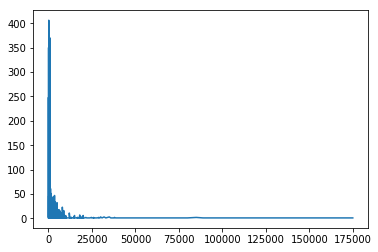

In [21]:
import matplotlib.pyplot as plt
plt.plot(price.index,price.values)
plt.show()

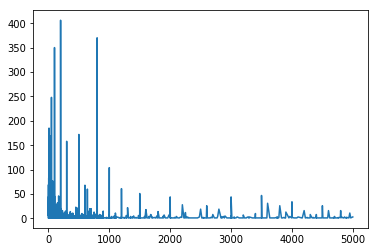

In [22]:
# 查看商品现价小于5000 的数据折线图便于确定数据分箱大小
data_5000 = data[data['商品现价']<5000]
price = data_5000['商品现价'].value_counts().sort_index()
plt.plot(price.index,price.values)
plt.show()

In [23]:
# 确定数据分箱0-99,100-199,200-299,300-399,400-499,500+
def get_level(p):
    level=p//100
    if level==0:
        return "0-99"
    elif level==1:
        return "100-199"
    elif level==2:
        return "200-299"
    elif level==3:
        return "300-399"
    elif level==4:
        return "400-499"
    elif level>=5:
        return "500+"
    else :
        return "计算出错"
data['价格等级'] = data['商品现价'].apply(get_level)

In [24]:
data['月销量'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23902    False
23903    False
23904    False
23905    False
23906     True
23907     True
23908    False
23909     True
23910    False
23911    False
23912    False
23913    False
23914    False
23915    False
23916    False
23917    False
23918    False
23919    False
23920    False
23921    False
23922    False
23923    False
23924    False
23925    False
23926    False
23927    False
23928    False
23929    False
23930    False
23931    False
Name: 月销量, Length: 23932, dtype: bool

In [25]:
# 处理商品月销量的缺失值
data[data['月销量'].isnull()]

,爬取链接,商品ID,商品名称,商品现价,商品原价,月销量,评论数,发货地址,商品发布时间,商品规格,...,商品参数,商品sku详情,商品链接,商品详情,店铺评分,宝贝收藏数,一级分类,二级分类,三级分类,价格等级
18465,https://item.taobao.com/item.htm?id=542315757302,542315757302,德希恩硝化细菌水族消化菌胶囊鱼缸水质澄清剂干粉硝化菌活菌净水,98.500,98.500,NaN,179.0,上海,1523947159,"[{""label"":""颜色分类"",""values"":[{""desc"":""德希恩2合1小包装""...",...,"[{""label"":""品牌"",""value"":""Desheehan/德希恩""},{""labe...","[{""sku_id"":""4321076330610"",""sku_name"":""德希恩淡水25...",https://item.taobao.com/item.htm?id=542315757302,undefined,"{'描述相符': ['4.8', '高于35.21%'], '服务态度': ['4.9', ...",125,水族世界,水质维护,硝化细菌,0-99
18473,https://item.taobao.com/item.htm?id=557157567264,557157567264,水族硝化菌净水剂活菌水质澄清剂鱼缸净水剂消化细菌液体硝化细菌,14.800,14.800,NaN,28.0,广东东莞,1570607187,"[{""label"":""颜色分类"",""values"":[{""desc"":""硝化菌125ml"",...",...,"[{""label"":""品牌"",""value"":""望舒水族""},{""label"":""颜色分类""...","[{""sku_id"":""3740034699037"",""sku_name"":""硝化菌258m...",https://item.taobao.com/item.htm?id=557157567264,undefined,"{'描述相符': ['4.8', '持平0.43%'], '服务态度': ['4.8', '...",61,水族世界,水质维护,硝化细菌,0-99
18474,https://item.taobao.com/item.htm?id=588282255894,588282255894,活体宠物猪可爱迷你猪侏儒猪抖音网红猪佩琪乔治纯种泰国小香猪公,88.000,588.000,NaN,1.0,辽宁沈阳,1551473546,[],...,"[{""label"":""品牌"",""value"":""迷你小香猪""},{""label"":""动物性别...",[],https://item.taobao.com/item.htm?id=588282255894,undefined,"{'描述相符': ['4.8', '持平0.10%'], '服务态度': ['4.4', '...",6,奇趣宠物,仓鼠类及其它小宠,香猪,0-99
18476,https://item.taobao.com/item.htm?id=588764710887,588764710887,小型萌宠迷你幼体泰国小香猪长不大活体宠物猪家养好养幼崽活物猪,780.000,780.000,NaN,35.0,广东广州,1569640445,[],...,"[{""label"":""品牌"",""value"":""泰国小香猪""},{""label"":""动物性别...",[],https://item.taobao.com/item.htm?id=588764710887,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",908,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18482,https://item.taobao.com/item.htm?id=603163402751,603163402751,蜗牛盒子 宠窝蜗牛大全 蜗牛幼体饲料 蜗牛饲料 饲养盒子蜗牛房子,11.210,16.020,NaN,NaN,北京,1569685256,[],...,"[{""label"":""品牌"",""value"":""other/其他""},{""label"":""原...",[],https://item.taobao.com/item.htm?id=603163402751,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",0,奇趣宠物,仓鼠类及其它小宠,饲料/零食,0-99
18487,https://item.taobao.com/item.htm?id=581946660178,581946660178,超可爱泰国迷你小香猪迷你猪 用品活体长不大的 买1送6纯种小香猪,50.000,50.000,NaN,NaN,广东广州,1542427024,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=581946660178,undefined,"{'描述相符': ['3.8', '低于20.07%'], '服务态度': ['3.8', ...",7,奇趣宠物,仓鼠类及其它小宠,香猪,0-99
18488,https://item.taobao.com/item.htm?id=562161761993,562161761993,宠物猫咪活体蓝猫 加菲猫折耳蓝猫布偶猫暹罗猫英短蓝白美短幼猫,600.000,600.000,NaN,NaN,山东临沂,1512790504,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=562161761993,undefined,未获取到数据,17,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18489,https://item.taobao.com/item.htm?id=604360390147,604360390147,原种杜洛克种公猪长白大约克公猪太湖猪苏太二元母猪30斤种猪包邮,500.000,500.000,NaN,NaN,江苏宿迁,1569637715,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=604360390147,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",1,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18490,https://item.taobao.com/item.htm?id=589742817020,589742817020,长不大的小香猪泰国进口小香猪小猪佩奇迷你宠物猪,880.000,880.000,NaN,NaN,湖南长沙,1553313207,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=589742817020,undefined,"{'描述相符': ['4.7', '低于1.81%'], '服务态度': ['4.6', '...",123,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18491,https://item.taobao.com/item.htm?id=606495535513,606495535513,网红猪佩琪宠物猪小香猪宠物长不大的泰国迷你小香猪 活 宠物活体,100.000,100.000,NaN,NaN,广东广州,1571456811,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=606495535513,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",3,奇趣宠物,仓鼠类及其它小宠,香猪,100-199


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 23 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品现价       23932 non-null float64
商品原价       23932 non-null float64
月销量        22410 non-null object
评论数        22840 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
价格等级       23932 non-null object
dtypes: float64(3), int64(3), object(17)
memory usage: 5.0+ MB


In [27]:
# 根据经验，月销量缺失都是对应的月销量为0，所有用0来填充缺失值。
data['月销量'] = data['月销量'].fillna(0)

In [28]:
data['月销量'].apply(int)

ValueError: invalid literal for int() with base 10: '5000+'

In [29]:
temp = []
for i in data['月销量']:
    if '+' in i:
        temp.append(int(i.replace('+','')))
    else :
        temp.append(int(i))

ValueError: invalid literal for int() with base 10: '1万'

In [30]:
temp = []
for i in data['月销量']:
    if '+' in i:
        d = i.replace('+','')
        if '万' in d:
            temp.append(int(d.replace('万',''))*10000)
        else:
            temp.append(int(d))
    else :
        temp.append(int(i))

ValueError: invalid literal for int() with base 10: '1.5'

In [31]:
temp = []
for i in data['月销量']:
    if '+' in i:
        d = i.replace('+','')
        if '万' in d:
            temp.append(float(d.replace('万',''))*10000)
        else:
            temp.append(int(d))
    else :
        temp.append(int(i))

TypeError: argument of type 'int' is not iterable

In [32]:
temp = []
for i in data['月销量']:
    i = str(i)
    if '+' in i:
        d = i.replace('+','')
        if '万' in d:
            temp.append(float(d.replace('万',''))*10000)
        else:
            temp.append(int(d))
    else :
        temp.append(int(i))

In [33]:
data['月销量'] = temp

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 23 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品现价       23932 non-null float64
商品原价       23932 non-null float64
月销量        23932 non-null float64
评论数        22840 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
价格等级       23932 non-null object
dtypes: float64(4), int64(3), object(16)
memory usage: 5.0+ MB


In [35]:
# 处理评论数缺失值,缺失原理与月销量相同，可以用0填充

In [36]:
data[data['评论数'].isnull()]

,爬取链接,商品ID,商品名称,商品现价,商品原价,月销量,评论数,发货地址,商品发布时间,商品规格,...,商品参数,商品sku详情,商品链接,商品详情,店铺评分,宝贝收藏数,一级分类,二级分类,三级分类,价格等级
18470,https://item.taobao.com/item.htm?id=607212238833,607212238833,纯种巴马香猪活体网红迷你小猪肉猪成年种猪怀孕母猪大型家养散养,50.000,50.000,7.0,NaN,山东菏泽,1572662968,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=607212238833,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",7,奇趣宠物,仓鼠类及其它小宠,香猪,0-99
18482,https://item.taobao.com/item.htm?id=603163402751,603163402751,蜗牛盒子 宠窝蜗牛大全 蜗牛幼体饲料 蜗牛饲料 饲养盒子蜗牛房子,11.210,16.020,0.0,NaN,北京,1569685256,[],...,"[{""label"":""品牌"",""value"":""other/其他""},{""label"":""原...",[],https://item.taobao.com/item.htm?id=603163402751,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",0,奇趣宠物,仓鼠类及其它小宠,饲料/零食,0-99
18487,https://item.taobao.com/item.htm?id=581946660178,581946660178,超可爱泰国迷你小香猪迷你猪 用品活体长不大的 买1送6纯种小香猪,50.000,50.000,0.0,NaN,广东广州,1542427024,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=581946660178,undefined,"{'描述相符': ['3.8', '低于20.07%'], '服务态度': ['3.8', ...",7,奇趣宠物,仓鼠类及其它小宠,香猪,0-99
18488,https://item.taobao.com/item.htm?id=562161761993,562161761993,宠物猫咪活体蓝猫 加菲猫折耳蓝猫布偶猫暹罗猫英短蓝白美短幼猫,600.000,600.000,0.0,NaN,山东临沂,1512790504,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=562161761993,undefined,未获取到数据,17,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18489,https://item.taobao.com/item.htm?id=604360390147,604360390147,原种杜洛克种公猪长白大约克公猪太湖猪苏太二元母猪30斤种猪包邮,500.000,500.000,0.0,NaN,江苏宿迁,1569637715,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=604360390147,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",1,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18490,https://item.taobao.com/item.htm?id=589742817020,589742817020,长不大的小香猪泰国进口小香猪小猪佩奇迷你宠物猪,880.000,880.000,0.0,NaN,湖南长沙,1553313207,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=589742817020,undefined,"{'描述相符': ['4.7', '低于1.81%'], '服务态度': ['4.6', '...",123,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18491,https://item.taobao.com/item.htm?id=606495535513,606495535513,网红猪佩琪宠物猪小香猪宠物长不大的泰国迷你小香猪 活 宠物活体,100.000,100.000,0.0,NaN,广东广州,1571456811,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=606495535513,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",3,奇趣宠物,仓鼠类及其它小宠,香猪,100-199
18492,https://item.taobao.com/item.htm?id=596847236257,596847236257,迷你小型萌宠泰国小香猪长不大活体宠物猪好养家养幼崽活物猪,888.000,888.000,0.0,NaN,广东广州,1569640444,[],...,"[{""label"":""动物性别"",""value"":""公""}]",[],https://item.taobao.com/item.htm?id=596847236257,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",6,奇趣宠物,仓鼠类及其它小宠,香猪,500+
18495,https://item.taobao.com/item.htm?id=606515185012,606515185012,可爱宠物活体宠物猪仔包邮毛毛网红四件套公仔动物活物迷你香猪,220.000,220.000,0.0,NaN,上海,1572055233,[],...,"[{""label"":""动物性别"",""value"":""母""}]",[],https://item.taobao.com/item.htm?id=606515185012,undefined,"{'描述相符': ['4.6', '低于3.53%'], '服务态度': ['4.6', '...",0,奇趣宠物,仓鼠类及其它小宠,香猪,200-299
18499,https://item.taobao.com/item.htm?id=606514533768,606514533768,佩琪毛毛宠物活体宠物猪仔活物包邮小猪仔广东网红宠物动物卡通,226.000,226.000,0.0,NaN,上海,1572055140,[],...,"[{""label"":""动物性别"",""value"":""母""}]",[],https://item.taobao.com/item.htm?id=606514533768,undefined,"{'描述相符': ['5.0', '高于100.00%'], '服务态度': ['5.0',...",0,奇趣宠物,仓鼠类及其它小宠,香猪,200-299


In [37]:
data['评论数'] = data['评论数'].fillna(0)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 23 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品现价       23932 non-null float64
商品原价       23932 non-null float64
月销量        23932 non-null float64
评论数        23932 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
价格等级       23932 non-null object
dtypes: float64(4), int64(3), object(16)
memory usage: 5.0+ MB


In [39]:
# 处理发货地址,提取发货省份数据
data['发货地址'][:5]

0    广东广州
1      上海
2      上海
3    山西运城
4      北京
Name: 发货地址, dtype: object

In [40]:
pro_list = ['北京',
 '上海',
 '天津',
 '重庆',
 '河北',
 '山西',
 '内蒙古',
 '黑龙江',
 '吉林',
 '辽宁',
 '陕西',
 '甘肃',
 '青海',
 '新疆',
 '宁夏',
 '山东',
 '河南',
 '江苏',
 '浙江',
 '安徽',
 '江西',
 '福建',
 '台湾',
 '湖北',
 '湖南',
 '广东',
 '广西',
 '海南',
 '四川',
 '云南',
 '贵州',
 '西藏',
 '香港',
 '澳门'
]


In [41]:
# 注意由于可能存在国外地区，所以如果在整个省份列表里没有找到对应的数据，
# 就使用原来的发货地址数据。
def get_place(s):
    for i in pro_list:
        if i in s:
            return i
    return s


In [42]:
# 使用get_place()函数修改原来的 发货地址
data['发货地址'] = data['发货地址'].apply(get_place)

In [43]:
# 查看发货地址数据
data['发货地址'].value_counts()

广东     5163
上海     3925
浙江     2934
北京     2151
江苏     1965
山东     1736
辽宁     1081
四川      780
河北      671
天津      627
河南      509
福建      384
湖北      363
湖南      240
安徽      201
重庆      198
陕西      133
山西      128
江西      122
广西      110
新疆      108
云南       91
黑龙江      88
贵州       88
吉林       67
海南       27
内蒙古      15
宁夏       10
甘肃        8
青海        3
西藏        3
海外        1
澳门        1
阿富汗       1
Name: 发货地址, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23932 entries, 0 to 23931
Data columns (total 23 columns):
爬取链接       23932 non-null object
商品ID       23932 non-null int64
商品名称       23932 non-null object
商品现价       23932 non-null float64
商品原价       23932 non-null float64
月销量        23932 non-null float64
评论数        23932 non-null float64
发货地址       23932 non-null object
商品发布时间     23932 non-null int64
商品规格       23932 non-null object
商品库存       23932 non-null int64
店铺名称       23929 non-null object
店铺链接       23932 non-null object
商品参数       23932 non-null object
商品sku详情    23932 non-null object
商品链接       23932 non-null object
商品详情       23932 non-null object
店铺评分       23932 non-null object
宝贝收藏数      23932 non-null object
一级分类       23932 non-null object
二级分类       23932 non-null object
三级分类       23932 non-null object
价格等级       23932 non-null object
dtypes: float64(4), int64(3), object(16)
memory usage: 5.0+ MB


In [45]:
# 商品规格是指购买商品时需要用户进行选择的具体种类，由于宠物数据种类非常繁多，
# 该数据不具备统一的格式，所以不处理也不使用该数据
# 同样的道理，商品的参数也不做处理

In [46]:
[i for i in data['商品规格'][:5]]

['[{"label":"颜色分类","values":[{"desc":"蛇仔2条（4-5cm）吃涡虫","image":"https://gd4.alicdn.com/imgextra/i3/60926918/O1CN01qYjTP320yUWi9tnWA_!!60926918.jpg"}]}]',
 '[{"label":"颜色分类","values":[{"desc":"4L水母缸(空缸）","image":""},{"desc":"4L蓝光不变色套餐（2只海月）","image":""},{"desc":"4L缸遥控变色套餐（2海月）","image":""},{"desc":"4L缸遥控变色套餐（3赤月）","image":""},{"desc":"7L缸遥控变色套餐（4海月）","image":""},{"desc":"7L缸遥控变色套餐（6赤月）","image":""},{"desc":"多加一只海月水母","image":""}]}]',
 '[{"label":"颜色分类","values":[{"desc":"2--2.2cm50条装","image":""},{"desc":"2--2.2cm100条装","image":""},{"desc":"2.2-2.5厘米30只装","image":""},{"desc":"2.2-2.5厘米50只装","image":""},{"desc":"2.5-2.8厘米30只装","image":""},{"desc":"2.5-2.8厘米50只装","image":""},{"desc":"39只1.6-2cm送一只防损耗","image":""},{"desc":"1.4-1.6厘米50只装送1只","image":""},{"desc":"1.4-1.6厘米100只装送两只","image":""},{"desc":"50只1.2厘米送5只防损耗","image":""},{"desc":"100只1.2厘米送10只防损耗","image":""},{"desc":"收到货第一时间请点数","image":""},{"desc":"不要倒入鱼缸里再点数鱼","image":""},{"desc":"请倒入泡沫箱里拍照点数","image":""},{"desc":"35只装2-2.2厘米","im

In [47]:
[i for i in data['商品详情'][:10]]

['<div> <a name="hlg_promo_desc_35740188_start"></a></div><table border="0" cellpadding="0" cellspacing="0" style="margin:0.0px auto;"> <tr>  <td>   <div class="hlg_promo_desc_35740188">    <img src="//img.alicdn.com/imgextra/i2/60926918/O1CN01M83kaX20yUXeDgXqD_!!60926918.png" width="750" height="186" size="750x186" />   </div></td> </tr></table><div> <a name="hlg_promo_desc_35740188_end"></a></div><p>\xa0</p><p><span style="font-size:36.0px;"><strong>可与虾混养解决虾缸蛋白虫、蜗虫问题</strong></span></p><p>\xa0</p><p>\xa0</p><p><img align="absmiddle" src="//img.alicdn.com/imgextra/i2/60926918/TB2ldNYbYwrBKNjSZPcXXXpapXa_!!60926918.jpg" style="max-width:750.0px;" size="750x730" /></p><div> <img align="absmiddle" src="//img.alicdn.com/imgextra/i3/60926918/O1CN01SDO0oB20yUWYyDPlx_!!60926918.jpg" style="max-width:750.0px;" size="750x622"><img align="absmiddle" src="//img.alicdn.com/imgextra/i4/60926918/O1CN01JsCF1520yUWgRpEYa_!!60926918.jpg" style="max-width:750.0px;" size="750x849"><img align="absmiddle"

In [48]:
# 处理店铺评分数据

In [49]:
# 首先确定有多少是'未获取到数据'
data[data['店铺评分'] =='未获取到数据'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 3 to 23341
Data columns (total 23 columns):
爬取链接       275 non-null object
商品ID       275 non-null int64
商品名称       275 non-null object
商品现价       275 non-null float64
商品原价       275 non-null float64
月销量        275 non-null float64
评论数        275 non-null float64
发货地址       275 non-null object
商品发布时间     275 non-null int64
商品规格       275 non-null object
商品库存       275 non-null int64
店铺名称       272 non-null object
店铺链接       275 non-null object
商品参数       275 non-null object
商品sku详情    275 non-null object
商品链接       275 non-null object
商品详情       275 non-null object
店铺评分       275 non-null object
宝贝收藏数      275 non-null object
一级分类       275 non-null object
二级分类       275 non-null object
三级分类       275 non-null object
价格等级       275 non-null object
dtypes: float64(4), int64(3), object(16)
memory usage: 51.6+ KB


In [50]:
# 由于只有275条数据，所以可以删除掉所有店铺评分是'未获取到数据'的数据行
data = data[data['店铺评分'] !='未获取到数据']
data.index = range(len(data))

In [51]:
# 提取描述相符、服务态度、物流服务三项内容的具体分数，
# 以及是处于持平、高于还是低于中的哪种状态
[i for i in data['店铺评分'][:5]]

["{'描述相符': ['4.8', '持平0.30%'], '服务态度': ['4.8', '高于5.47%'], '物流服务': ['4.8', '高于1.50%']}",
 "{'描述相符': ['4.5', '低于5.52%'], '服务态度': ['4.7', '低于2.79%'], '物流服务': ['4.7', '低于1.53%']}",
 "{'描述相符': ['4.8', '高于34.13%'], '服务态度': ['4.9', '高于43.14%'], '物流服务': ['4.9', '高于32.40%']}",
 "{'描述相符': ['4.8', '高于30.77%'], '服务态度': ['4.9', '高于47.04%'], '物流服务': ['4.9', '高于43.80%']}",
 "{'描述相符': ['4.8', '高于35.26%'], '服务态度': ['4.9', '高于61.41%'], '物流服务': ['4.8', '持平0.48%']}"]

In [52]:
# 先通过eval()函数把每个字符串里面的字典取出来
[eval(i) for i in data['店铺评分']]
# 出现报错，查看有多少是'该店铺尚未收到评价'

NameError: name '该店铺尚未收到评价' is not defined

In [53]:
data[data['店铺评分'] =='该店铺尚未收到评价'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 101 to 23383
Data columns (total 23 columns):
爬取链接       318 non-null object
商品ID       318 non-null int64
商品名称       318 non-null object
商品现价       318 non-null float64
商品原价       318 non-null float64
月销量        318 non-null float64
评论数        318 non-null float64
发货地址       318 non-null object
商品发布时间     318 non-null int64
商品规格       318 non-null object
商品库存       318 non-null int64
店铺名称       318 non-null object
店铺链接       318 non-null object
商品参数       318 non-null object
商品sku详情    318 non-null object
商品链接       318 non-null object
商品详情       318 non-null object
店铺评分       318 non-null object
宝贝收藏数      318 non-null object
一级分类       318 non-null object
二级分类       318 non-null object
三级分类       318 non-null object
价格等级       318 non-null object
dtypes: float64(4), int64(3), object(16)
memory usage: 59.6+ KB


In [54]:
# 删除掉所有'店铺评分'是'该店铺尚未收到评价'的数据
data = data[data['店铺评分'] !='该店铺尚未收到评价']
data.index = range(len(data))

In [55]:
# 先通过eval()函数把每个字符串里面的字典取出来
data['店铺评分'] = [eval(i) for i in data['店铺评分']]


In [56]:
[i for i in data['店铺评分'][:5]]

[{'描述相符': ['4.8', '持平0.30%'],
  '服务态度': ['4.8', '高于5.47%'],
  '物流服务': ['4.8', '高于1.50%']},
 {'描述相符': ['4.5', '低于5.52%'],
  '服务态度': ['4.7', '低于2.79%'],
  '物流服务': ['4.7', '低于1.53%']},
 {'描述相符': ['4.8', '高于34.13%'],
  '服务态度': ['4.9', '高于43.14%'],
  '物流服务': ['4.9', '高于32.40%']},
 {'描述相符': ['4.8', '高于30.77%'],
  '服务态度': ['4.9', '高于47.04%'],
  '物流服务': ['4.9', '高于43.80%']},
 {'描述相符': ['4.8', '高于35.26%'],
  '服务态度': ['4.9', '高于61.41%'],
  '物流服务': ['4.8', '持平0.48%']}]

In [57]:
# 提取描述评分
[i['描述相符'][0] for i in data['店铺评分'][:5]]

['4.8', '4.5', '4.8', '4.8', '4.8']

In [58]:
data['描述评分'] = [float(i['描述相符'][0]) for i in data['店铺评分']]

In [59]:
[i['描述相符'][1] for i in data['店铺评分'][:5]]

['持平0.30%', '低于5.52%', '高于34.13%', '高于30.77%', '高于35.26%']

In [60]:
# 提取描述评分水平
[i['描述相符'][1][:2] for i in data['店铺评分'][:10]]

['持平', '低于', '高于', '高于', '高于', '低于', '高于', '低于', '低于', '低于']

In [61]:
data['描述评分水平']=[i['描述相符'][1][:2] for i in data['店铺评分']]

In [62]:
# 相同的方式提取服务评分和服务评分水平
data['服务评分'] = [float(i['服务态度'][0]) for i in data['店铺评分']]
data['服务评分水平']=[i['服务态度'][1][:2] for i in data['店铺评分']]

In [63]:
# 相同的方式提取物流评分及物流评分水平
data['物流评分'] = [float(i['物流服务'][0]) for i in data['店铺评分']]
data['物流评分水平']=[i['物流服务'][1][:2] for i in data['店铺评分']]

In [64]:
# 创建平均评分 数据列，即将描述评分、服务评分和物流评分计算平均值
data['平均评分'] = (data['描述评分'] + data['服务评分'] + data['物流评分'])/3

In [65]:
data.loc[0]

爬取链接        https://item.taobao.com/item.htm?id=566960035676
商品ID                                            566960035676
商品名称                           蛇仔鱼苦力泥鳅观赏鱼热带鱼除蛋白虫涡虫虾缸搭档清洁鱼易养鱼
商品现价                                                     9.9
商品原价                                                   14.14
月销量                                                      303
评论数                                                     1055
发货地址                                                      广东
商品发布时间                                            1558231120
商品规格       [{"label":"颜色分类","values":[{"desc":"蛇仔2条（4-5cm...
商品库存                                                   90500
店铺名称                                                 优鱼自然水族馆
店铺链接                         https://shop64472738.taobao.com
商品参数       [{"label":"品牌","value":"青青自然"},{"label":"品种","...
商品sku详情    [{"sku_id":"3770715903143","sku_name":"蛇仔2条（4-...
商品链接        https://item.taobao.com/item.htm?id=566960035676
商品详情       <div> <a name

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23339 entries, 0 to 23338
Data columns (total 30 columns):
爬取链接       23339 non-null object
商品ID       23339 non-null int64
商品名称       23339 non-null object
商品现价       23339 non-null float64
商品原价       23339 non-null float64
月销量        23339 non-null float64
评论数        23339 non-null float64
发货地址       23339 non-null object
商品发布时间     23339 non-null int64
商品规格       23339 non-null object
商品库存       23339 non-null int64
店铺名称       23339 non-null object
店铺链接       23339 non-null object
商品参数       23339 non-null object
商品sku详情    23339 non-null object
商品链接       23339 non-null object
商品详情       23339 non-null object
店铺评分       23339 non-null object
宝贝收藏数      23339 non-null object
一级分类       23339 non-null object
二级分类       23339 non-null object
三级分类       23339 non-null object
价格等级       23339 non-null object
描述评分       23339 non-null float64
描述评分水平     23339 non-null object
服务评分       23339 non-null float64
服务评分水平     23339 non-null obje

In [67]:
# 处理宝贝收藏数，没有缺失值
# 查看数据
data['宝贝收藏数']

0          957
1            4
2        13617
3         8764
4          403
5            0
6          376
7            1
8           85
9           11
10          20
11          48
12          17
13          72
14         419
15          29
16         338
17          52
18          52
19         343
20         279
21           5
22         783
23         227
24           5
25         529
26        3813
27        4663
28        8707
29         272
         ...  
23309       43
23310       87
23311       18
23312       59
23313       44
23314        2
23315       28
23316       33
23317       17
23318        7
23319       29
23320        1
23321       78
23322       47
23323       23
23324      213
23325      375
23326       22
23327       37
23328       51
23329      104
23330      723
23331        6
23332        6
23333      141
23334       28
23335       84
23336       12
23337       12
23338        9
Name: 宝贝收藏数, Length: 23339, dtype: object

In [68]:
# 强制将字符串转化为整数
[int(i) for i in data['宝贝收藏数']]

[957,
 4,
 13617,
 8764,
 403,
 0,
 376,
 1,
 85,
 11,
 20,
 48,
 17,
 72,
 419,
 29,
 338,
 52,
 52,
 343,
 279,
 5,
 783,
 227,
 5,
 529,
 3813,
 4663,
 8707,
 272,
 922,
 3739,
 1177,
 4472,
 2884,
 10404,
 1814,
 1394,
 8427,
 120,
 2415,
 9233,
 4688,
 17448,
 20,
 9,
 27,
 14,
 2134,
 1802,
 5720,
 3261,
 31,
 68,
 2530,
 564,
 28414,
 14,
 10474,
 0,
 3708,
 12704,
 3160,
 100,
 4236,
 2580,
 9,
 1590,
 736,
 11,
 57,
 1083,
 611,
 13,
 175,
 618,
 323,
 344,
 5,
 1147,
 14,
 1395,
 151,
 633,
 21,
 103,
 483,
 15,
 108,
 456,
 378,
 209,
 286,
 36,
 109,
 219,
 611,
 853,
 4,
 0,
 0,
 503,
 0,
 0,
 161,
 4,
 0,
 0,
 13,
 0,
 504,
 1679,
 130,
 5744,
 3,
 156,
 274,
 318,
 205,
 916,
 782,
 562,
 2197,
 48,
 1235,
 136,
 51,
 396,
 10,
 179,
 135,
 68,
 357,
 109,
 25,
 2036,
 56,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2856,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 22,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 32,
 1,
 0,
 0,
 4,
 81,
 536,


In [69]:
data['宝贝收藏数'] = [int(i) for i in data['宝贝收藏数']]

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23339 entries, 0 to 23338
Data columns (total 30 columns):
爬取链接       23339 non-null object
商品ID       23339 non-null int64
商品名称       23339 non-null object
商品现价       23339 non-null float64
商品原价       23339 non-null float64
月销量        23339 non-null float64
评论数        23339 non-null float64
发货地址       23339 non-null object
商品发布时间     23339 non-null int64
商品规格       23339 non-null object
商品库存       23339 non-null int64
店铺名称       23339 non-null object
店铺链接       23339 non-null object
商品参数       23339 non-null object
商品sku详情    23339 non-null object
商品链接       23339 non-null object
商品详情       23339 non-null object
店铺评分       23339 non-null object
宝贝收藏数      23339 non-null int64
一级分类       23339 non-null object
二级分类       23339 non-null object
三级分类       23339 non-null object
价格等级       23339 non-null object
描述评分       23339 non-null float64
描述评分水平     23339 non-null object
服务评分       23339 non-null float64
服务评分水平     23339 non-null objec

In [71]:
# 梳理序号
data.index = range(len(data))

In [72]:
data.loc[0]

爬取链接        https://item.taobao.com/item.htm?id=566960035676
商品ID                                            566960035676
商品名称                           蛇仔鱼苦力泥鳅观赏鱼热带鱼除蛋白虫涡虫虾缸搭档清洁鱼易养鱼
商品现价                                                     9.9
商品原价                                                   14.14
月销量                                                      303
评论数                                                     1055
发货地址                                                      广东
商品发布时间                                            1558231120
商品规格       [{"label":"颜色分类","values":[{"desc":"蛇仔2条（4-5cm...
商品库存                                                   90500
店铺名称                                                 优鱼自然水族馆
店铺链接                         https://shop64472738.taobao.com
商品参数       [{"label":"品牌","value":"青青自然"},{"label":"品种","...
商品sku详情    [{"sku_id":"3770715903143","sku_name":"蛇仔2条（4-...
商品链接        https://item.taobao.com/item.htm?id=566960035676
商品详情       <div> <a name

In [73]:
# 创建销售额数据列,提示:商品现价数据列* 评论数据列
data['销售额']=data['商品现价']*data['评论数']

In [74]:
data.loc[0]

爬取链接        https://item.taobao.com/item.htm?id=566960035676
商品ID                                            566960035676
商品名称                           蛇仔鱼苦力泥鳅观赏鱼热带鱼除蛋白虫涡虫虾缸搭档清洁鱼易养鱼
商品现价                                                     9.9
商品原价                                                   14.14
月销量                                                      303
评论数                                                     1055
发货地址                                                      广东
商品发布时间                                            1558231120
商品规格       [{"label":"颜色分类","values":[{"desc":"蛇仔2条（4-5cm...
商品库存                                                   90500
店铺名称                                                 优鱼自然水族馆
店铺链接                         https://shop64472738.taobao.com
商品参数       [{"label":"品牌","value":"青青自然"},{"label":"品种","...
商品sku详情    [{"sku_id":"3770715903143","sku_name":"蛇仔2条（4-...
商品链接        https://item.taobao.com/item.htm?id=566960035676
商品详情       <div> <a name

In [75]:
# 创建商品折扣数据 即用商品现价/商品原价
data['商品折扣']=np.round(data['商品现价']/data['商品原价'],2)

In [76]:
data['商品折扣']

0        0.70
1        0.48
2        1.00
3        0.86
4        1.00
5        1.00
6        0.63
7        1.00
8        1.00
9        1.00
10       1.00
11       1.00
12       1.00
13       1.00
14       1.00
15       1.00
16       1.00
17       1.00
18       0.70
19       0.40
20       0.88
21       1.00
22       1.00
23       1.00
24       0.98
25       1.00
26       0.80
27       1.00
28       0.99
29       1.00
         ... 
23309    1.00
23310    1.00
23311    1.00
23312    0.80
23313    0.80
23314    1.00
23315    1.00
23316    0.50
23317    1.00
23318    1.00
23319    0.80
23320    1.00
23321    0.68
23322    1.00
23323    1.00
23324    0.40
23325    1.00
23326    1.00
23327    1.00
23328    1.00
23329    1.00
23330    1.00
23331    0.50
23332    1.00
23333    1.00
23334    1.00
23335    1.00
23336    1.00
23337    1.00
23338    1.00
Name: 商品折扣, Length: 23339, dtype: float64

In [77]:
# 将数据保存为csv格式

In [82]:
data.to_csv("宠物商品详细信息_处理后.csv",index = None)